# Counting spells in Harry Potter books
I want to discover two things.
- Which book is the most spell intensive?
- What is the most common spell in each of the Harry Potter books?

In [11]:
import pandas as pd
import glob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

### Files
I am working with two datasets:
- The seven Harry Potter books in .txt format
- A list of spells in .csv format

In [12]:
# Reading in the list of books
books = glob.glob(r'.\books\*.txt')

In [13]:
# Putting the books into a dataframe
contents = [open(book,encoding='Latin5').read() for book in books]
books_df = pd.DataFrame({
    'book': books,
    'body': contents,
})
books_df.head()

,body,book
0,/ \n\n\n\n\nTHE BOY WHO LIVED \n\nMr. and Mrs....,.\books\Book 1 - The Philosopher's Stone_djvu.txt
1,\nJ . K . R O W L ! N G \n\nHARRY \n\nPOTTER \...,.\books\Book 2 - The Chamber of Secrets_djvu.txt
2,/ \n\n\n\n\nOWL POST \n\nHarry Potter was a hi...,.\books\Book 3 - The Prisoner of Azkaban_djvu.txt
3,/ \n\n\n\n\nTHE RIDDLE HOUSE \n\nThe villagers...,.\books\Book 4 - The Goblet of Fire_djvu.txt
4,HARRY \n\nPOTTER \n\n\n\n\nI \n\n\n\n\nDUDLEY ...,.\books\Book 5 - The Order of the Phoenix_djvu...


In [15]:
# Reading in the list of spells
spells = pd.read_csv('spells.csv')['spell'].tolist()

### 1. What is the most spell-intensive book?
I'll use the vectorizers to count how many spells, in percentage of all the words, are in each book

In [16]:
# This counts ALL the words
vectorizer = TfidfVectorizer(use_idf=False, norm='l1')
matrix = vectorizer.fit_transform(books_df['body'])
matrix

<7x23930 sparse matrix of type '<class 'numpy.float64'>'
	with 70133 stored elements in Compressed Sparse Row format>

In [17]:
# And this creates a grid out of it.
# NOTE: the (number)harry words came from page enumeration strings.
results = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
results.head(1)

,01,10,100,1002harry,1003harry,1004harry,1005harry,1006harry,1007harry,1008harry,...,zograf,zombie,zone,zonko,zonkoâ,zoo,zoological,zoom,zoomed,zooming
0,0.0,0.000025,0.000013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000025,0.0,0.0,0.0,0.000089,0.0,0.000013,0.000013,0.000025


In [20]:
# But I want to look ONLY at the spells.
# This recquires some handling, though. I want to look just at the spells that appear in the books - there are some more in the list.
# Also, if a spell is composed of more than two words, I'll look just at the first one. e.g 'Avada Kedavra' will be AVADA.
spells = [spell.split()[0] for spell in spells]

In [21]:
# Make the list into a dataframe so I can filter only the spells that appear in the book
spells_df = pd.DataFrame({
    'spell': spells,
})
spells_df.head()

,spell
0,Accio
1,Aguamenti
2,Alohomora
3,Aparecium
4,Avada


In [43]:
# Keeping only the spells that appear in the book - and in the books_df headers, this way
spells_df = spells_df[spells_df['spell'].str.lower().isin(list(results.columns.values))]

In [44]:
# Making everything lowercase in order to compare
spells_df['spell'] = spells_df['spell'].str.lower()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [52]:
# And getting only the magic words!
results_spells = results[spells_df['spell'].tolist()]

In [54]:
# What is the total % of magic words
results_spells['magic_%'] = results_spells.sum(axis=1)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [63]:
# What is the most spell-intenstive book?
results_spells['magic_%'].sort_values(ascending=False)

6    0.000732
2    0.000662
5    0.000591
3    0.000511
4    0.000501
0    0.000266
1    0.000263
Name: magic_%, dtype: float64

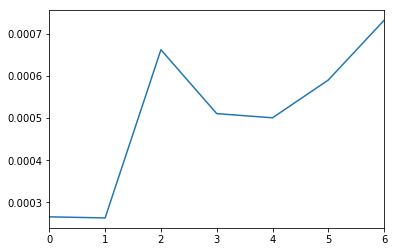

In [62]:
# Let's plot a line chart and see the trend.
results_spells['magic_%'].plot()

The last book in the series is the most spell-intensive, followed by the third one! Most interestingly, there is a huge increase in the last three installments of the series.

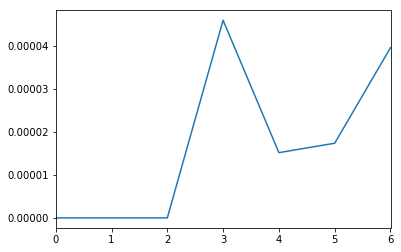

In [65]:
# FUN FACT: As Avada Kedavra is the wizarding-world equivalent of a gunshot, we can say that Harry Potter and The Golbet of Fire was the most violent book in the series, proportionally.
results_spells['avada'].plot()

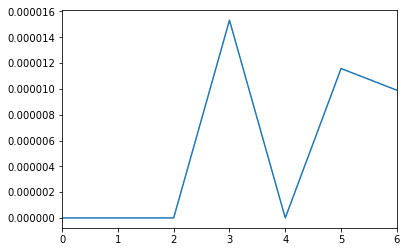

In [66]:
# And it was also the most SADISTIC one, with abuse of the torture spell.
results_spells['crucio'].plot()

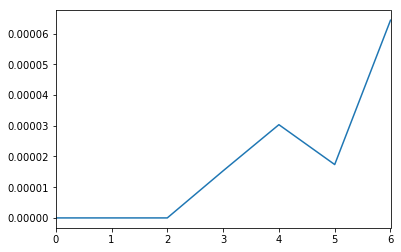

In [67]:
# And as the series progressed, people got lazy - 'accio' is a spell that finds and brings things to the hands of the wizard.
results_spells['accio'].plot()

### 2. What are the most common spells, overall and in each book?

In [ ]:
# TO DO